In [1]:
from utils import load_from_json
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

def plot_multiple_confusion_matrices(cms, labels=None):
    """
    Plots multiple confusion matrices separately.
    
    Parameters:
    - cms (list): List of confusion matrices, one per fold.
    - labels (list): List of class labels for the x and y ticks.
    """
    num_folds = len(cms)
    fig, axes = plt.subplots(1, num_folds, figsize=(6 * num_folds, 6))
    
    for i, cm in enumerate(cms):
        ax = axes[i] if num_folds > 1 else axes
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=labels, yticklabels=labels, ax=ax)
        ax.set_title(f'Confusion Matrix Fold {i+1}')
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')

    plt.tight_layout()
    plt.show()


def plot_aggregated_confusion_matrix(cms, labels=None):
    """
    Aggregates multiple confusion matrices and plots the cumulative matrix.
    
    Parameters:
    - cms (list): List of confusion matrices.
    - labels (list): List of class labels for the x and y ticks.
    """
    # Sum the confusion matrices
    cumulative_cm = np.sum(cms, axis=0)
    
    # Plot the cumulative confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cumulative_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title('Cumulative Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()


def plot_average_confusion_matrix(cms, labels=None):
    """
    Averages multiple confusion matrices and plots the result.
    
    Parameters:
    - cms (list): List of confusion matrices.
    - labels (list): List of class labels for the x and y ticks.
    """
    # Calculate the average confusion matrix
    average_cm = np.mean(cms, axis=0)
    
    # Plot the average confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(average_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title('Average Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(cm, labels=None, title='Confusion Matrix'):
    """
    Plots a confusion matrix with heatmap visualization.
    
    Parameters:
    - cm (array-like): Confusion matrix, typically a 2D array or matrix.
    - labels (list): List of class labels to use for the x and y ticks. 
    - title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.tight_layout()
    plt.show()


def kfold_results(classification_metrics_list):
    print("#"*10 + " K-fold results " + "#"*10)
    metric_names = list(classification_metrics_list[0].keys())
    confusion_matrices = list()

    for metric_name in metric_names:
        if metric_name not in ["confusion_matrix", "classification_report"]:
            kfold_metric = [x[metric_name] for x in classification_metrics_list]
            print(f"{metric_name}: mean: {np.mean(np.array(kfold_metric))}, std: {np.std(np.array(kfold_metric))}")
        if metric_name == "confusion_matrix":
            confusion_matrices = [np.array(x["confusion_matrix"]) for x in classification_metrics_list]

    return confusion_matrices


def print_plot_results(dir):
    kfold_mlp = load_from_json(dir)
    confusion_matrices = kfold_results(kfold_mlp)
    labels = [str(i) for i in range(len(confusion_matrices[0]))]
    plot_multiple_confusion_matrices(confusion_matrices, labels=labels)
    plot_aggregated_confusion_matrix(confusion_matrices, labels=labels)
    plot_average_confusion_matrix(confusion_matrices, labels=labels)

# mlp network on mlp data

########## K-fold results ##########
accuracy: mean: 0.9723809523809525, std: 0.008275308189039423
precision: mean: 0.9704346095641979, std: 0.006296980190401455
recall: mean: 0.9723809523809525, std: 0.008275308189039423
f1: mean: 0.9696705449768319, std: 0.008228008682433152
below_diagonal_percentage: mean: 0.025238095238095237, std: 0.007766431633476232


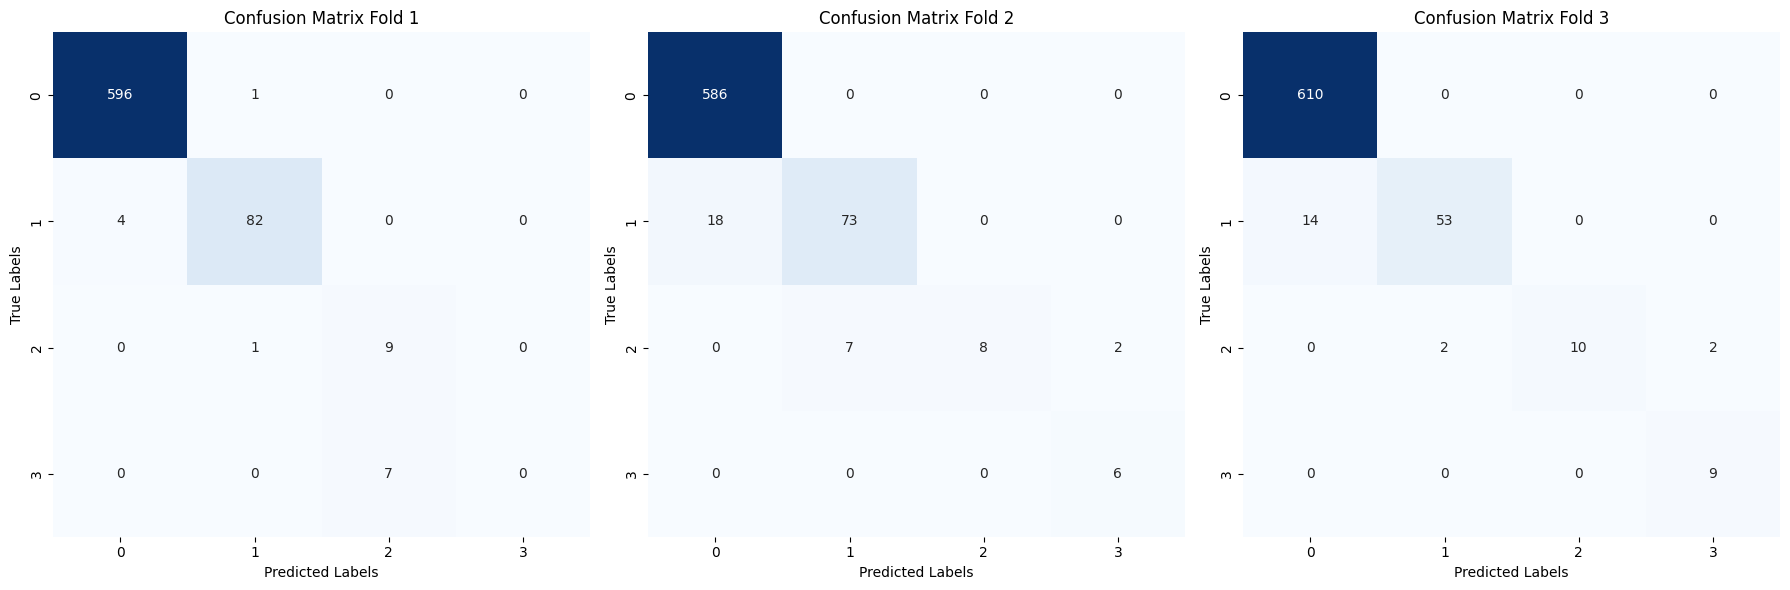

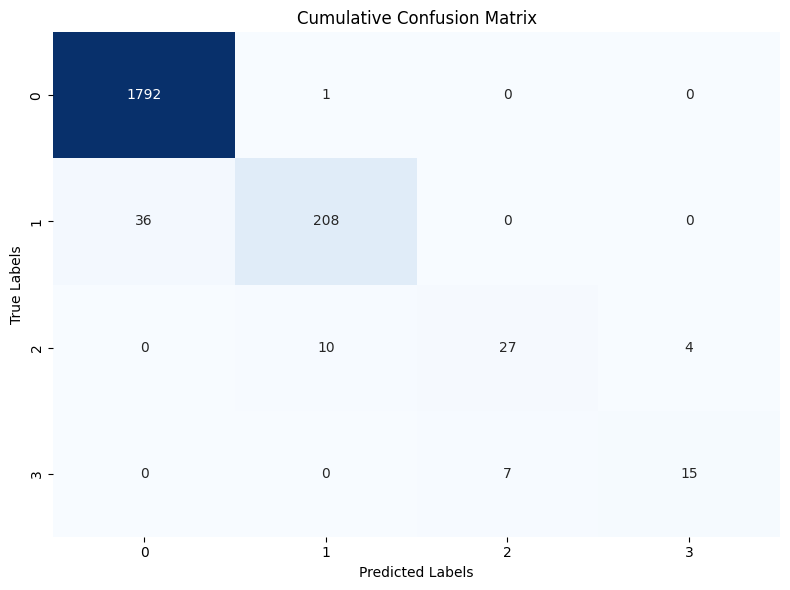

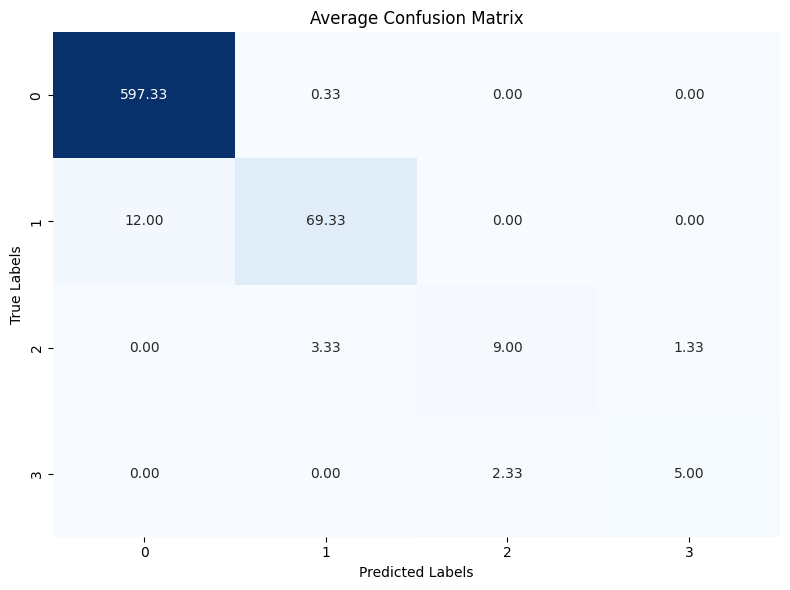

In [2]:
print_plot_results("./k_fold_results/mlp_model/mlp.json")

# mlp network on cnn data

########## K-fold results ##########
accuracy: mean: 0.8260964912280703, std: 0.011699104095043076
precision: mean: 0.8297017581495494, std: 0.008050995259781856
recall: mean: 0.8260964912280703, std: 0.011699104095043076
f1: mean: 0.8267978794873329, std: 0.010354712805308757
below_diagonal_percentage: mean: 0.075, std: 0.0046520182972799124


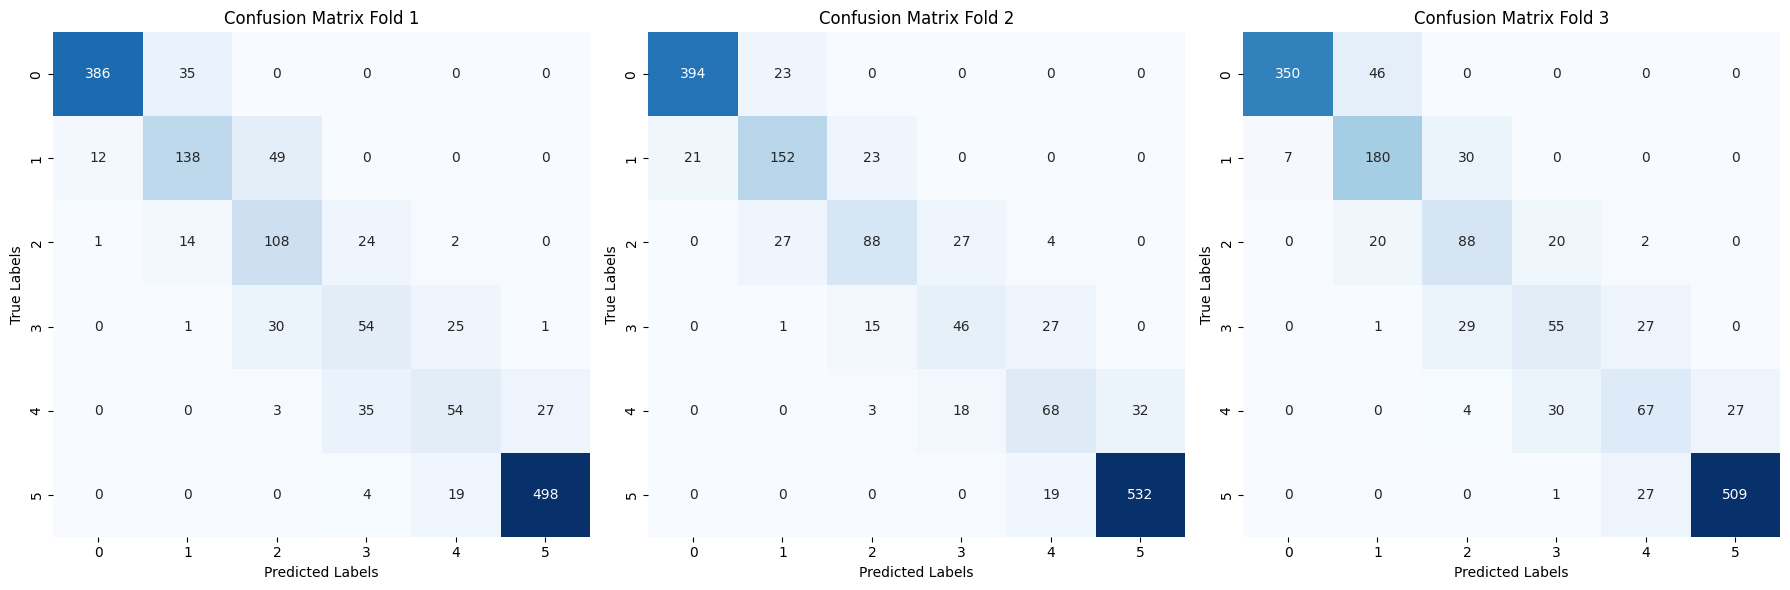

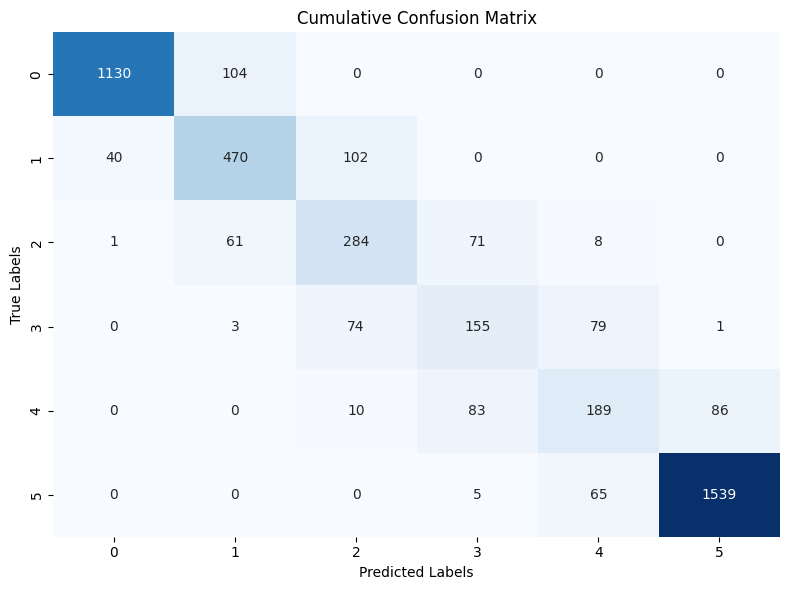

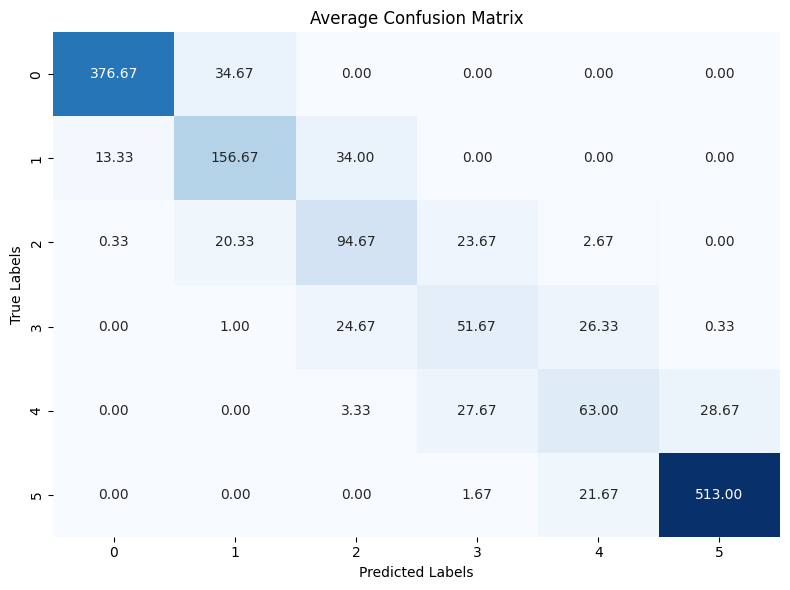

In [4]:
print_plot_results("./k_fold_results/mlp_model/cnn.json")

# mlp network on transformer data

########## K-fold results ##########
accuracy: mean: 0.8765326489877389, std: 0.00443579959683603
precision: mean: 0.8788885573627562, std: 0.002987573675829168
recall: mean: 0.8765326489877389, std: 0.00443579959683603
f1: mean: 0.875801619576797, std: 0.003438710044072149
below_diagonal_percentage: mean: 0.060450527516395784, std: 0.008844061830208628


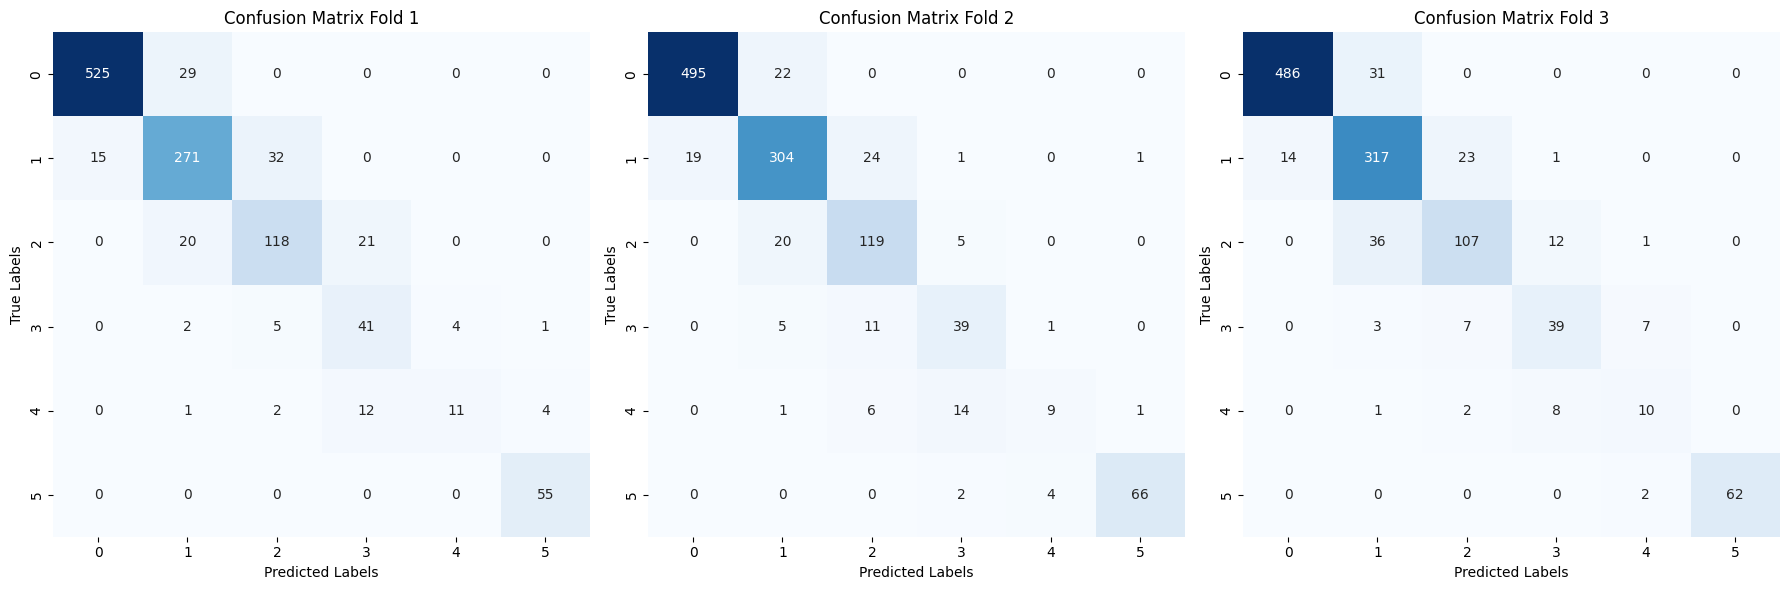

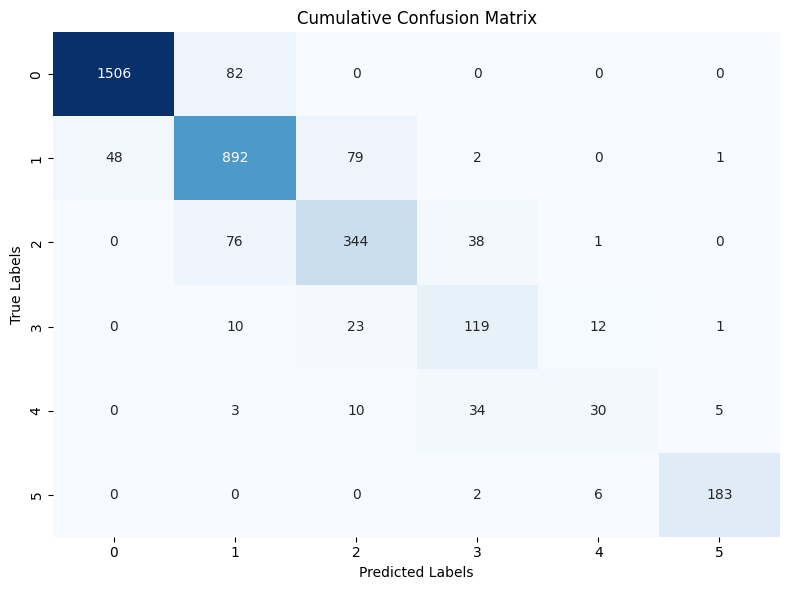

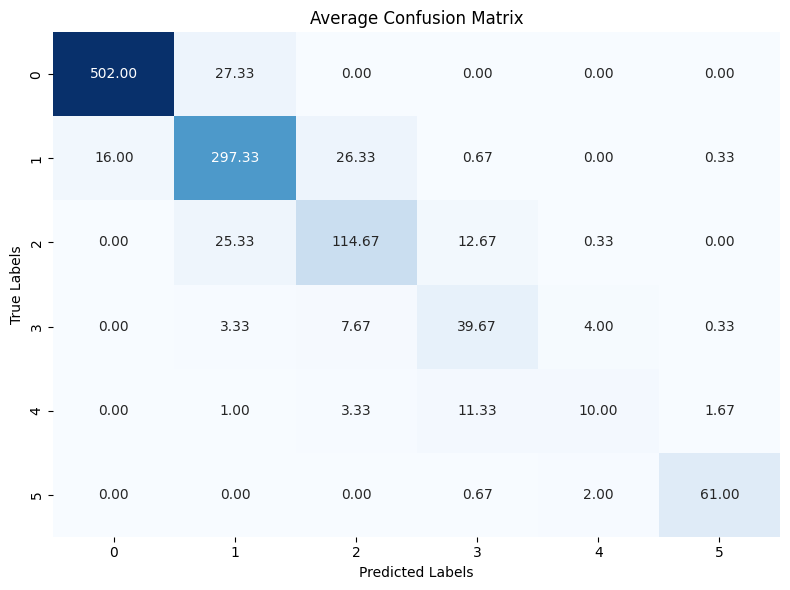

In [5]:
print_plot_results("./k_fold_results/mlp_model/transformer.json")


# transformer model on mlp data

########## K-fold results ##########
accuracy: mean: 0.9838095238095238, std: 0.01019092121858702
precision: mean: 0.9838617711131078, std: 0.01023467862929948
recall: mean: 0.9838095238095238, std: 0.01019092121858702
f1: mean: 0.9834272685464426, std: 0.010568920442939975
below_diagonal_percentage: mean: 0.01, std: 0.007284313590846836


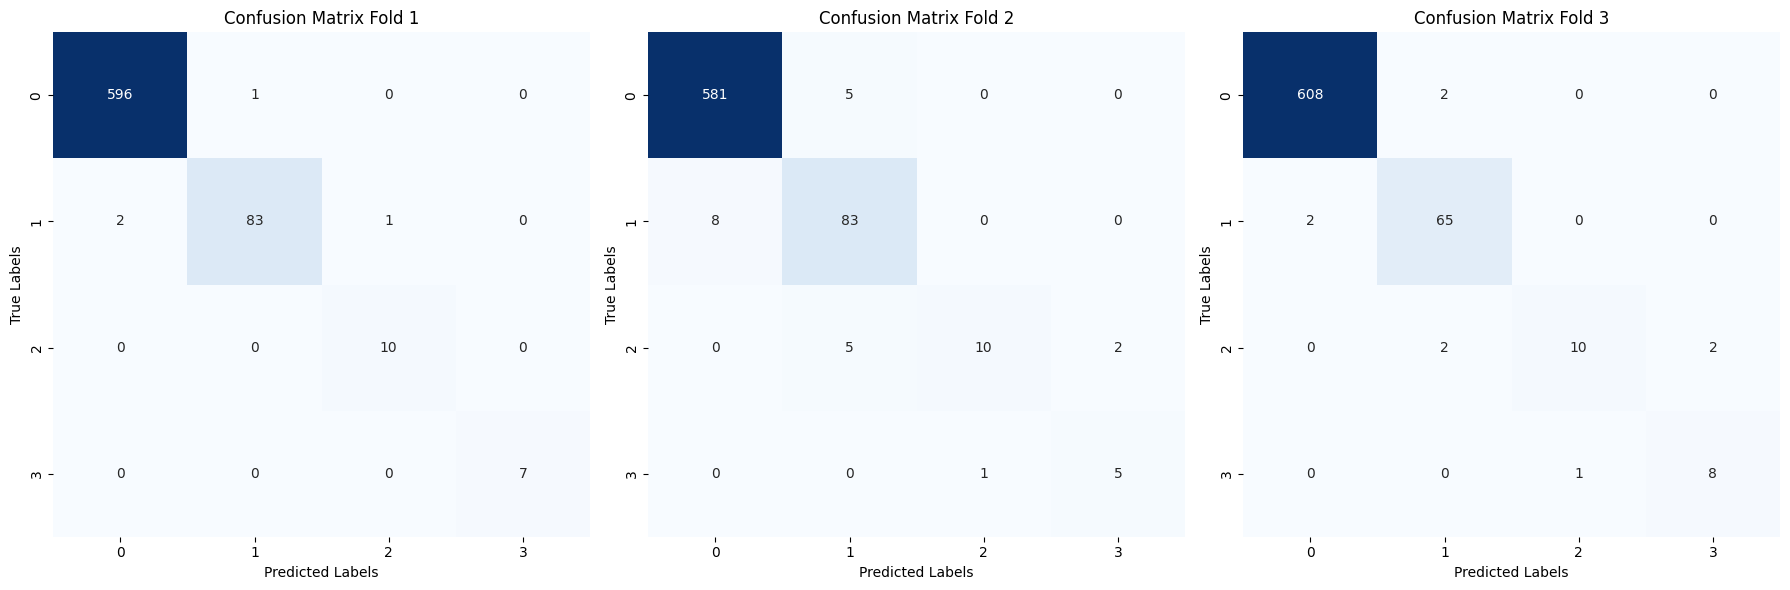

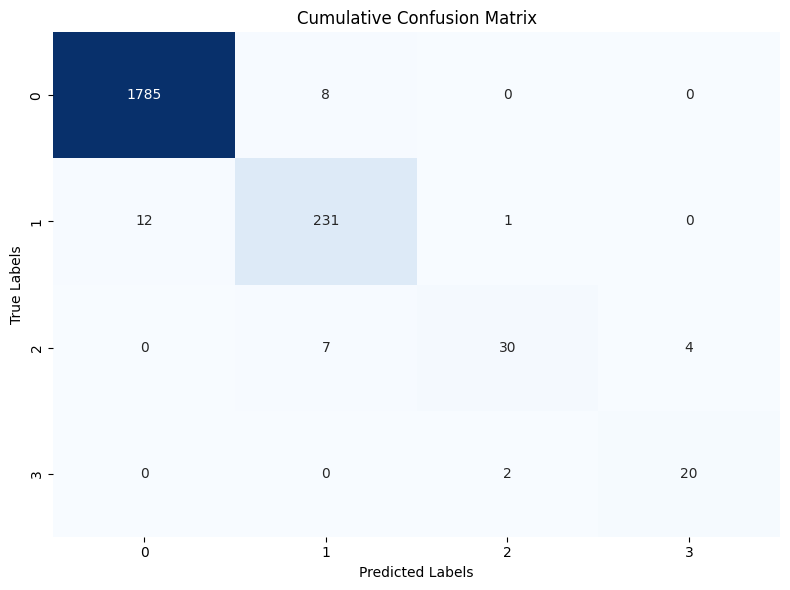

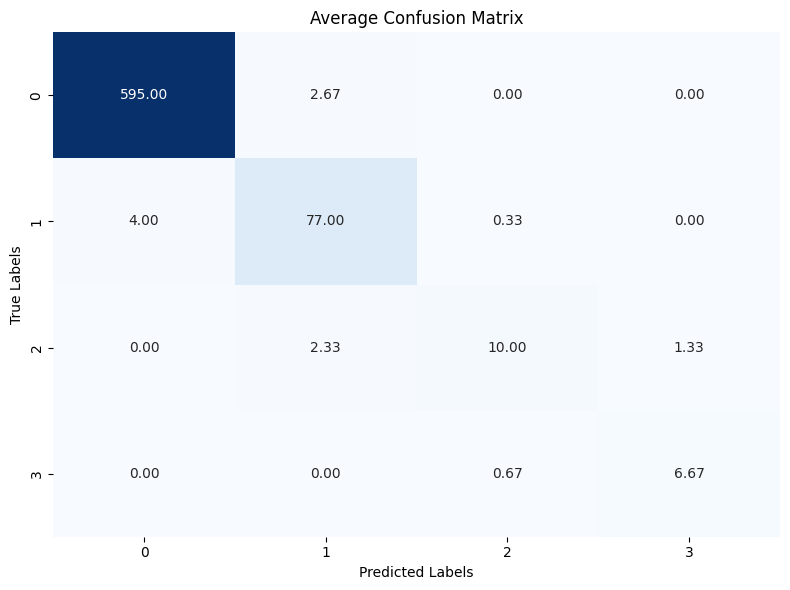

In [6]:
print_plot_results("./k_fold_results/transformer_model/mlp.json")

# transformer model on cnn data

########## K-fold results ##########
accuracy: mean: 0.8107456140350878, std: 0.010667005707908196
precision: mean: 0.819037050934566, std: 0.0013758110935240013
recall: mean: 0.8107456140350878, std: 0.010667005707908196
f1: mean: 0.8122378436330818, std: 0.007225977498959328
below_diagonal_percentage: mean: 0.06535087719298245, std: 0.016028286591773334


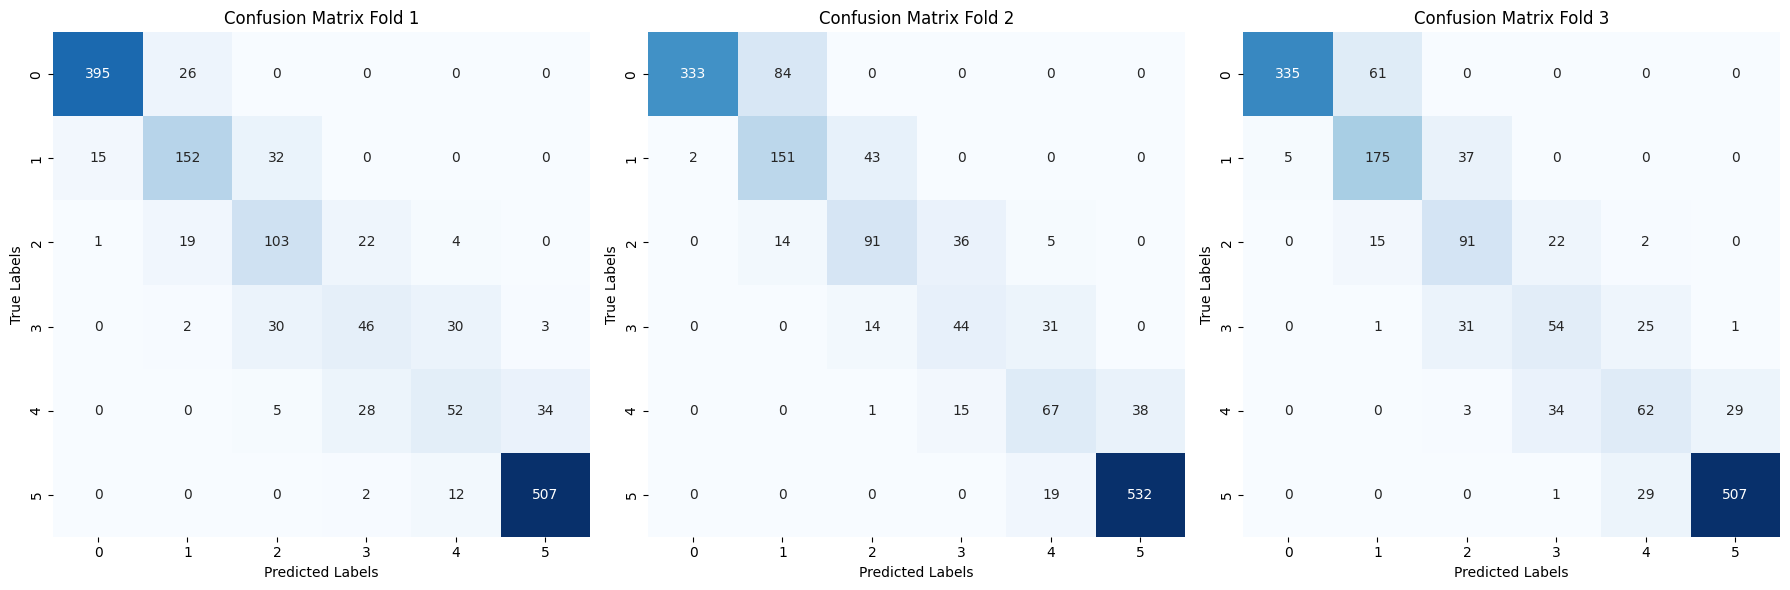

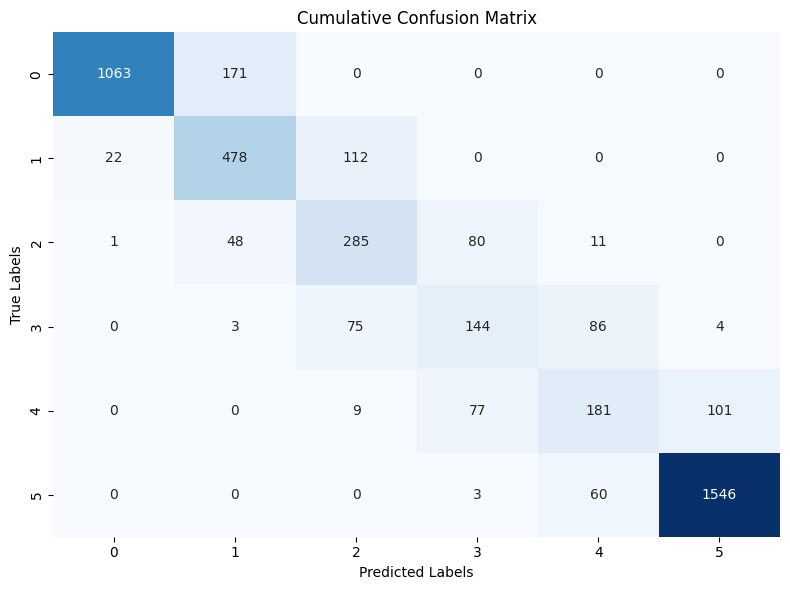

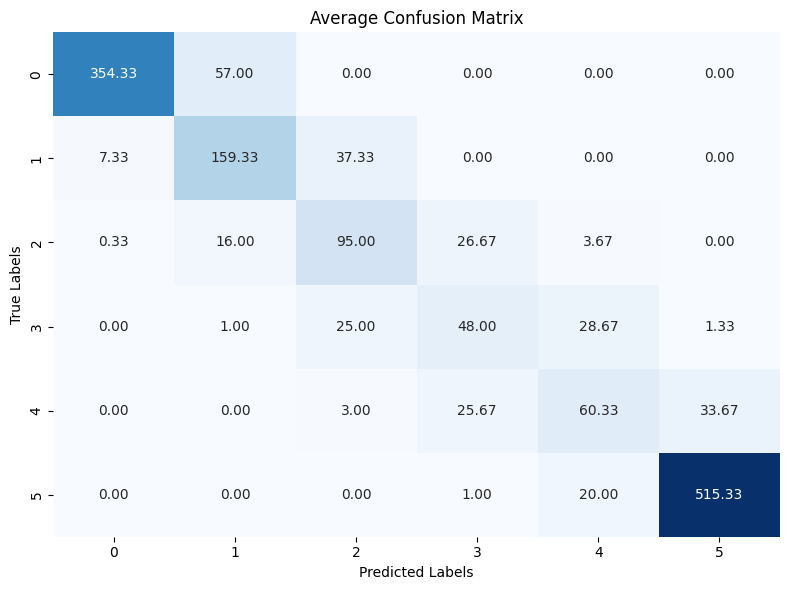

In [7]:
print_plot_results("./k_fold_results/transformer_model/cnn.json")


# transformer model on transformer data

########## K-fold results ##########
accuracy: mean: 0.8571428571428571, std: 0.015973154917776886
precision: mean: 0.8618802100968793, std: 0.009216896616274377
recall: mean: 0.8571428571428571, std: 0.015973154917776886
f1: mean: 0.8580306478303248, std: 0.012614516286980884
below_diagonal_percentage: mean: 0.06159110350727117, std: 0.02416500751381614


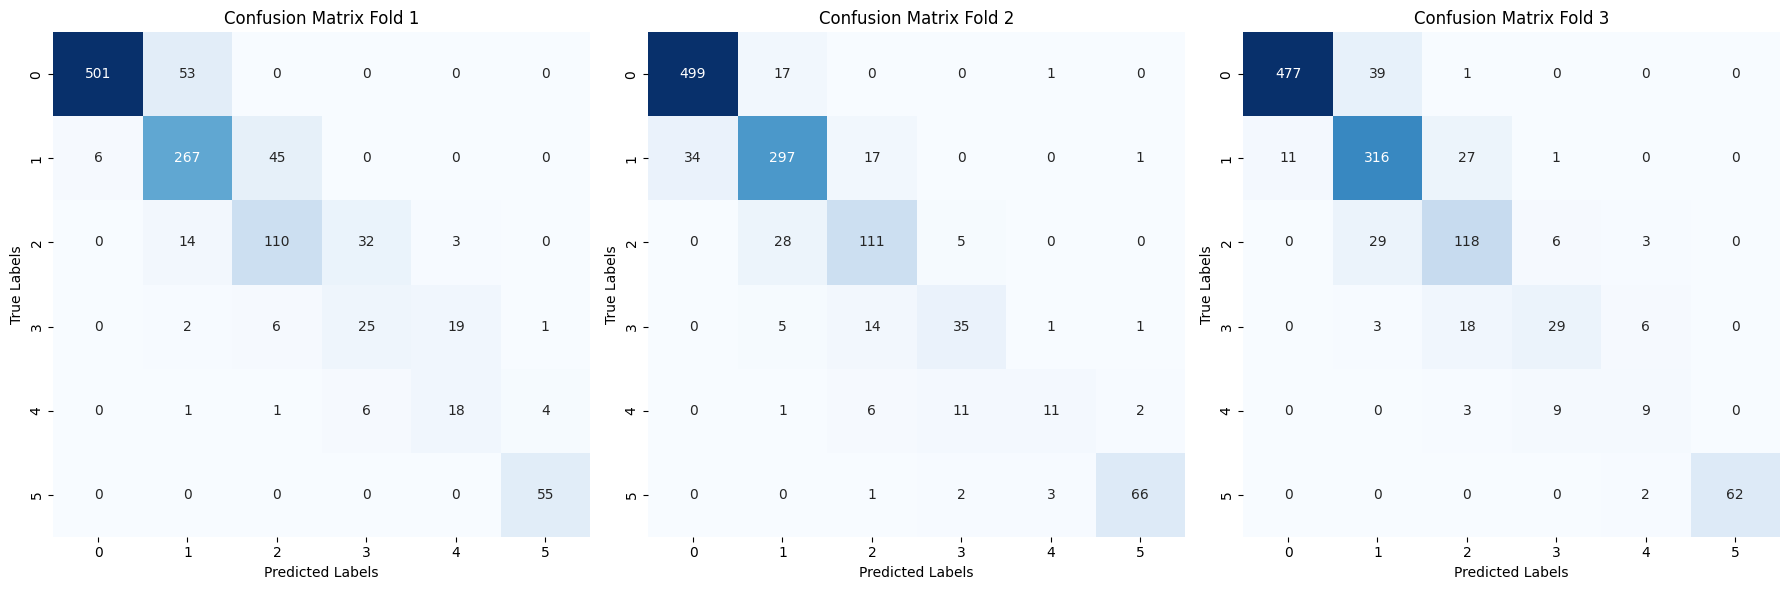

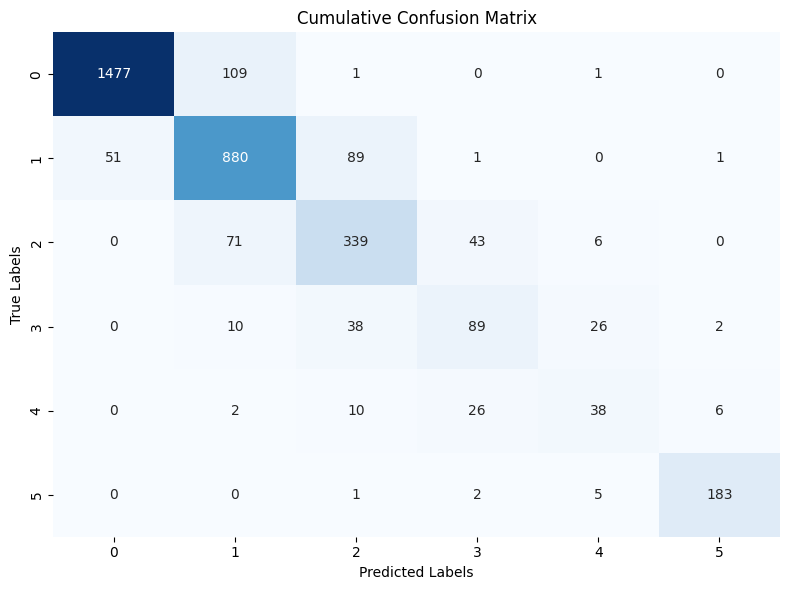

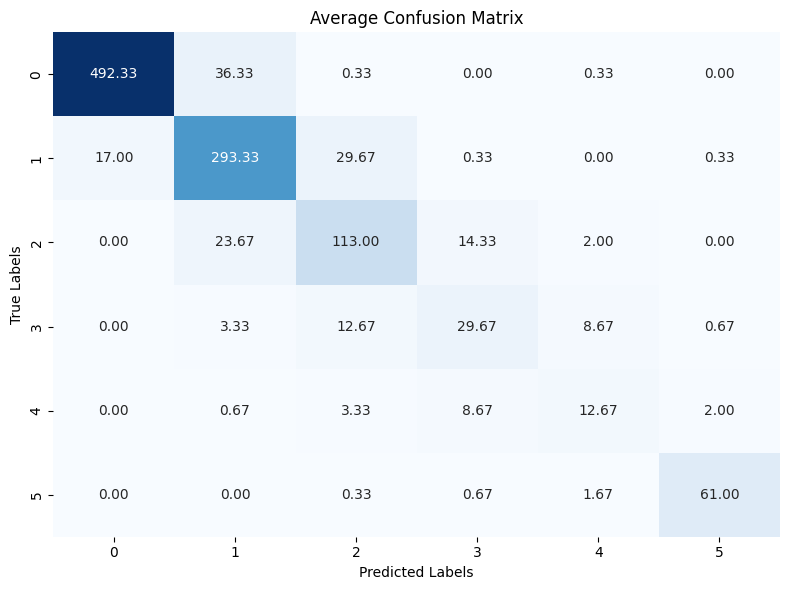

In [8]:
print_plot_results("./k_fold_results/transformer_model/transformer.json")
